# Prepare rules for the all the data sets 


## Book Dataset

In [1]:
#installing library
#!pip install mlxtend

In [2]:
#importing libraries 
import mlxtend
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading data using pandas
book=pd.read_csv('book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
book.shape #the dataset has 2000 rows and 11 colmns

(2000, 11)

In [5]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [56]:
book.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

## Apriori Algorithm 

In [6]:
frequent_itemsets=apriori(book,min_support=0.1,use_colnames=True)  #min support criteria is 10%
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [7]:
#look at output
#in 0-8 rows have one item list , then two item list and likewise.
#Apriori alogorithm has 38 possibles combination with each feature with respect to another one.

In [8]:
frequent_itemsets.sort_values('support',ascending=False).head()

,support,itemsets
2,0.431,(CookBks)
0,0.423,(ChildBks)
3,0.282,(DoItYBks)
6,0.276,(GeogBks)
10,0.256,"(ChildBks, CookBks)"


In [9]:
#data is ordered in decending order so the (CookBks) has hightest support.

In [10]:
#now if we change the support value then
frequent_itemsets1=apriori(book,min_support=0.3,use_colnames=True)  #min support criteria is 30%
frequent_itemsets1

,support,itemsets
0,0.423,(ChildBks)
1,0.431,(CookBks)


In [11]:
'''as we change the support value to 30% then Apriori alogorithm has made 2 possibles combination with each 
    feature with respect to another one.It printed values which as support percentage more than 30%.'''

'as we change the support value to 30% then Apriori alogorithm has made 2 possibles combination with each \n    feature with respect to another one.It printed values which as support percentage more than 30%.'

In [12]:
#defing association rule.

rules=association_rules(frequent_itemsets,metric="lift",min_threshold=0.7)
rules

rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
83,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159
89,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354
94,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
52,"(ChildBks, RefBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534
...,...,...,...,...,...,...,...,...,...
92,(CookBks),"(GeogBks, DoItYBks)",0.4310,0.1325,0.1085,0.251740,1.899926,0.051392,1.159357
73,(ChildBks),"(GeogBks, DoItYBks)",0.4230,0.1325,0.1045,0.247045,1.864490,0.048452,1.152127
79,(ChildBks),"(ArtBks, GeogBks)",0.4230,0.1275,0.1020,0.241135,1.891253,0.048067,1.149743
99,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [13]:
rules.shape

(100, 9)

In [14]:
#the rule is giving 100 rows with 9 columns using metric has "lift" which taking lift values which are more than 70%.

In [15]:
rules.sort_values('lift',ascending = False)[0:20]  #displying first 20 values.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
84,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


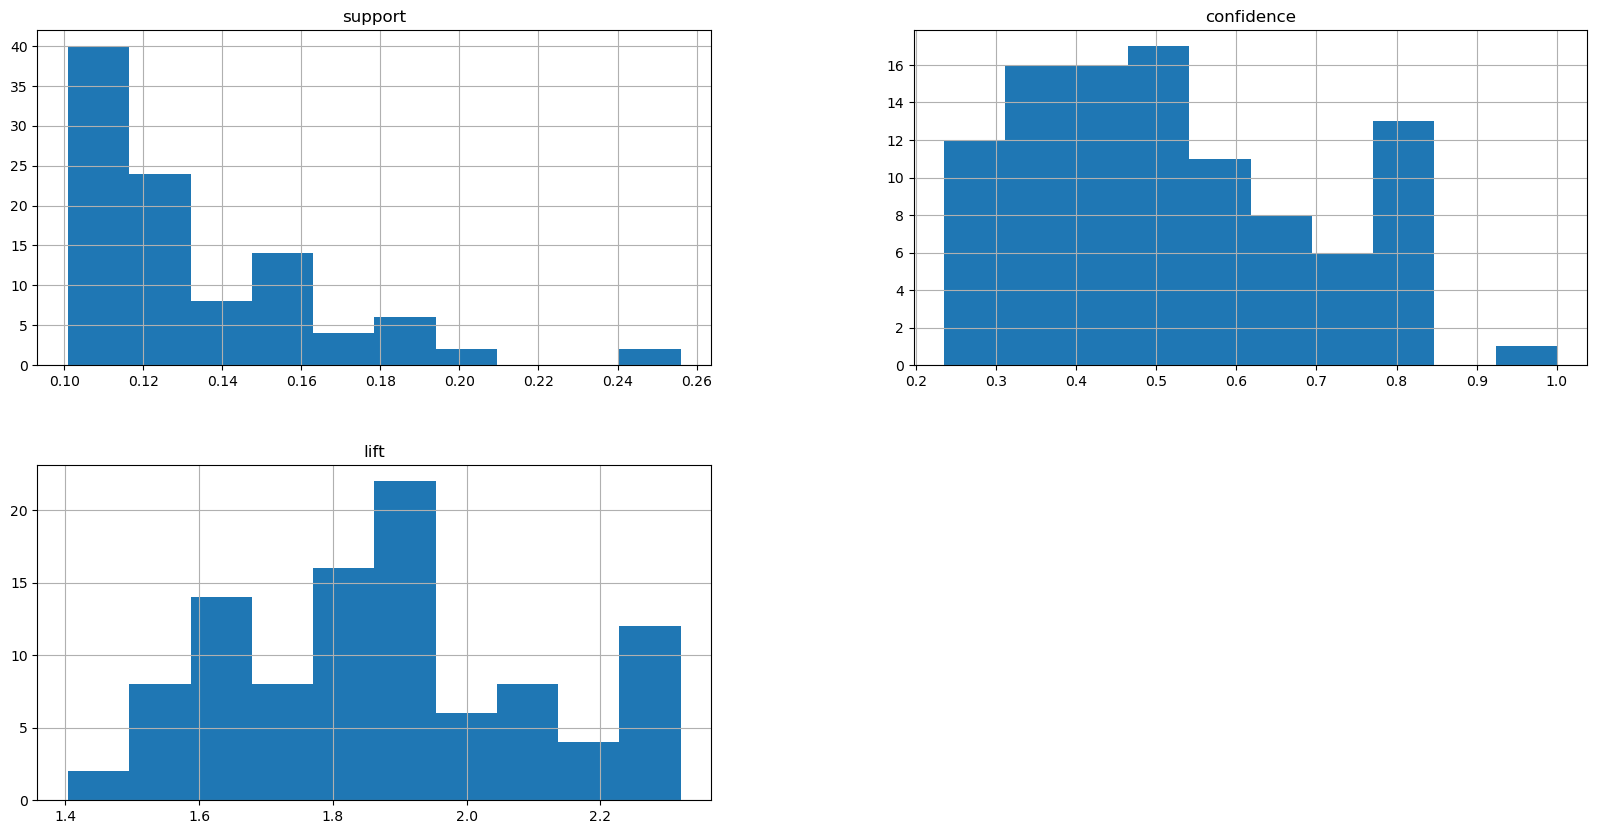

In [16]:
rules[['support','confidence','lift']].hist(figsize=(20,10))
plt.show()

In [17]:
cor=rules.corr()
cor

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
antecedent support,1.000000,-0.592374,0.406223,-0.783487,-0.372747,0.215552,-0.739801
consequent support,-0.592374,1.000000,0.406223,0.934687,-0.372747,0.215552,0.791718
support,0.406223,0.406223,1.000000,0.154020,-0.684585,0.715494,-0.060557
confidence,-0.783487,0.934687,0.154020,1.000000,-0.036715,0.186727,0.908200
lift,-0.372747,-0.372747,-0.684585,-0.036715,1.000000,-0.054561,0.047668
leverage,0.215552,0.215552,0.715494,0.186727,-0.054561,1.000000,0.012068
conviction,-0.739801,0.791718,-0.060557,0.908200,0.047668,0.012068,1.000000


<AxesSubplot:>

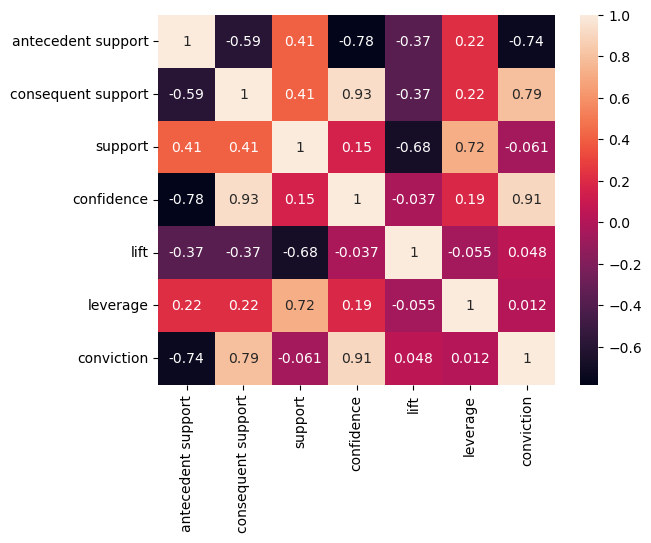

In [18]:
sns.heatmap(cor,annot=True)

In [19]:
#the conviction has high corelation with confidence.So, they are more correlated to each other.

<AxesSubplot:xlabel='conviction', ylabel='confidence'>

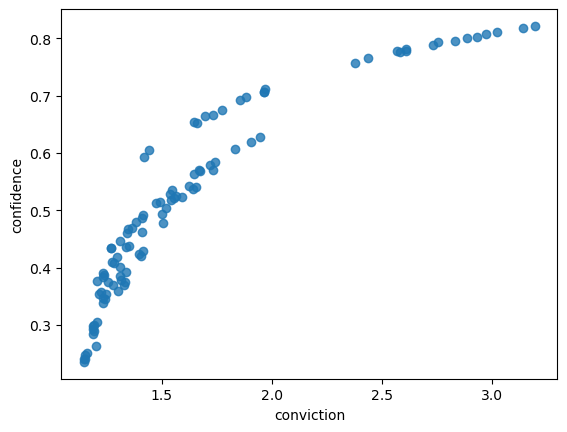

In [20]:
sns.regplot(x='conviction',y='confidence',data=rules)

In [21]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
84,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
53,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

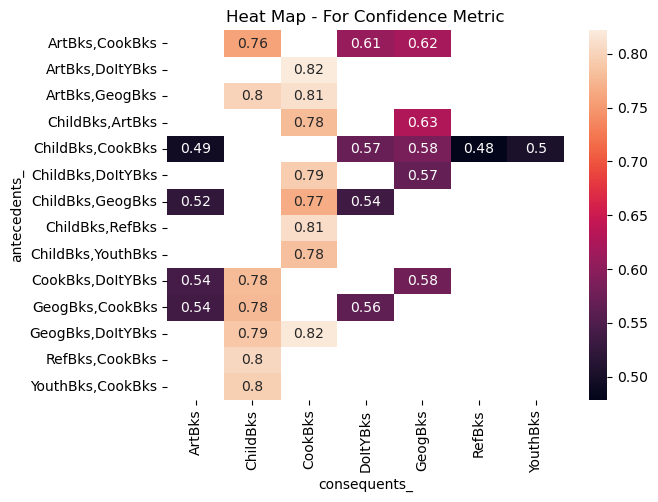

In [22]:
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [ ]:
'''Insights: 1.If a person is buying Art books and DoltY or Geog books then person will definitely buy Cook books.
             2.If a person is buys Child books along with Art,DoltY,Geog,Ref,Youth books then there are more chances that person will 
               definitely buy Cook books.
             3.And if they buys Cook books with respect to DoltY,Geog,Ref and Youth books then they will buy Child books also. '''

In [23]:
#now we are changing the threshold value

#defing association rule.

new_rules=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.3)
new_rules

new_rules.sort_values('confidence',ascending=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
42,(ChildBks),"(YouthBks, CookBks)",0.4230,0.1620,0.1290,0.304965,1.882497,0.060474,1.205694
48,(CookBks),"(ChildBks, DoItYBks)",0.4310,0.1840,0.1460,0.338747,1.841017,0.066696,1.234021
47,(ChildBks),"(CookBks, DoItYBks)",0.4230,0.1875,0.1460,0.345154,1.840820,0.066687,1.240749
63,(CookBks),"(ChildBks, GeogBks)",0.4310,0.1950,0.1495,0.346868,1.778809,0.065455,1.232522
61,(ChildBks),"(GeogBks, CookBks)",0.4230,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894
...,...,...,...,...,...,...,...,...,...
50,"(ChildBks, RefBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534
84,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
80,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354
75,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159


In [24]:
new_rules.shape

(89, 9)

In [25]:
#the rule is giving 89 rows with 9 columns using metric has "confidence" which taking confidence values which are more than 30%.

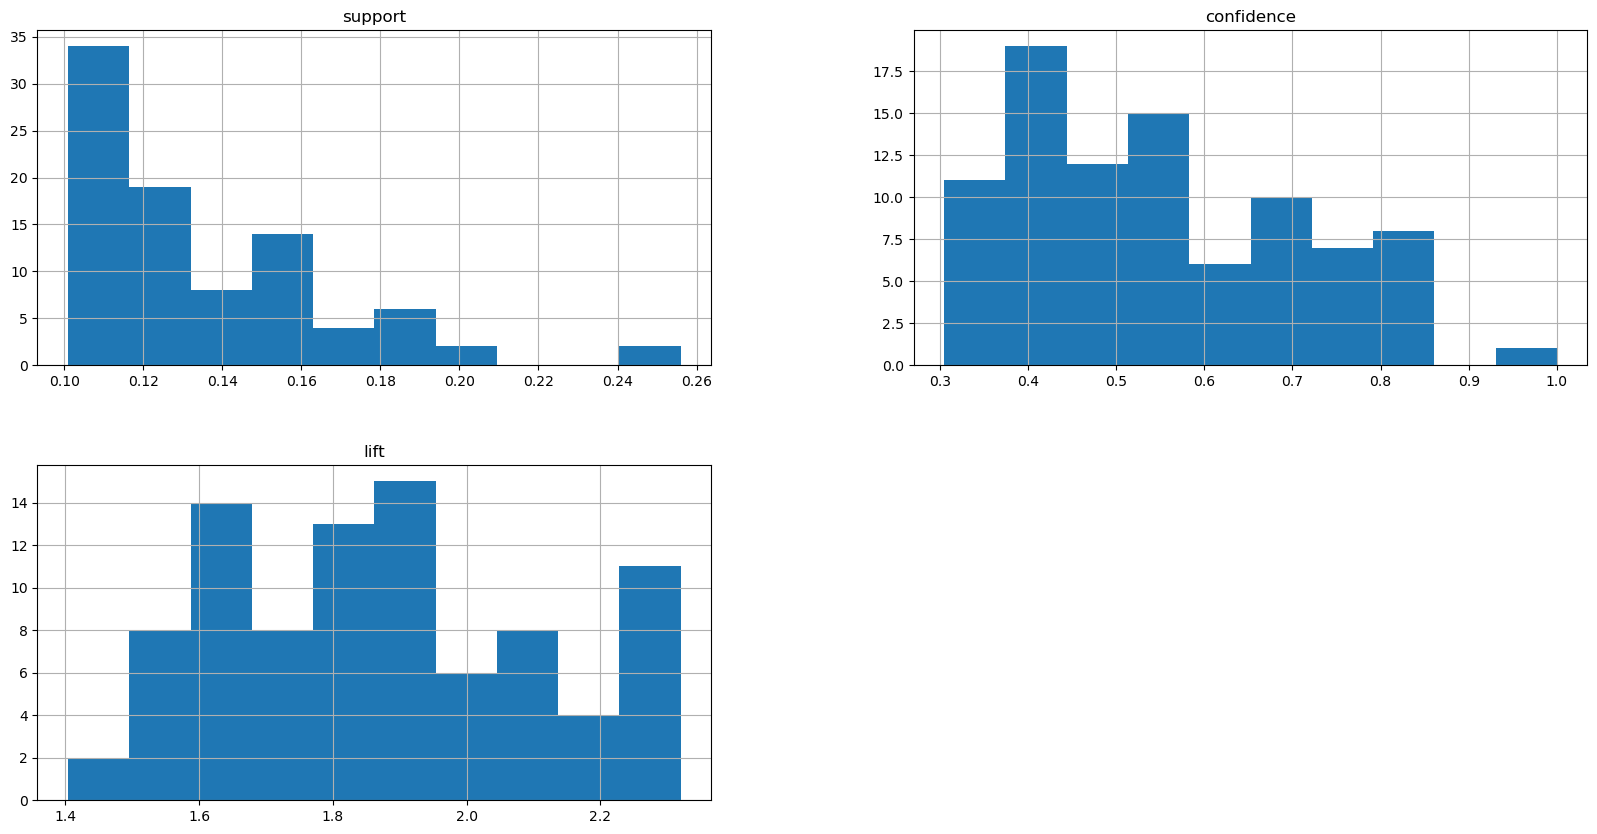

In [26]:
new_rules[['support','confidence','lift']].hist(figsize=(20,10))
plt.show()

In [27]:
new_rules['LHS items'] = new_rules['antecedents'].apply(lambda x:len(x) )
new_rules[new_rules['LHS items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,LHS items
69,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
76,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
85,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
86,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
51,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

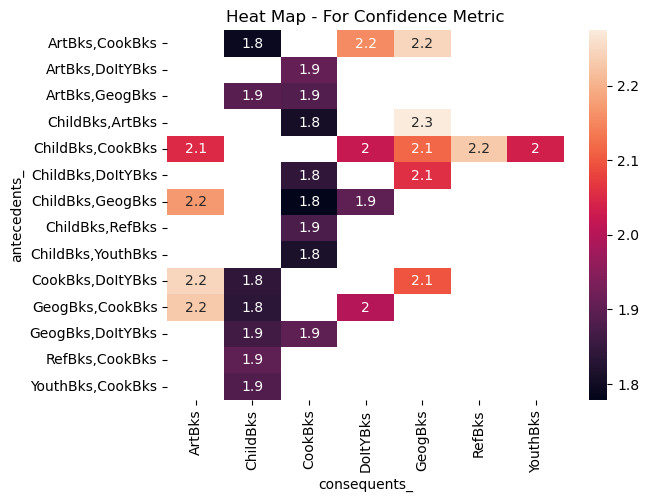

In [28]:
new_rules['antecedents_'] = new_rules['antecedents'].apply(lambda a: ','.join(list(a)))
new_rules['consequents_'] = new_rules['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = new_rules[new_rules['LHS items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

## My Movies Dataset

In [29]:
#reading dataset
movies=pd.read_csv('my_movies.csv')
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [30]:
movies.shape

(10, 15)

In [31]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [57]:
movies.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [32]:
#as we can see that data is not in proper format there are null values so we will drop that colmns and only take numeric data.
movies_data=movies.iloc[:,5:]
movies_data.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [33]:
movies_data.shape

(10, 10)

## Apriori Algorithm 

In [34]:
itemsets=apriori(movies_data,min_support=0.1,use_colnames=True) #min support has 10% of criteria .
itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [35]:
#look at output
#in 0-9 rows have one item list , then two item list and likewise.
#Apriori alogorithm has 52 possibles combination with each feature with respect to another one.

In [36]:
itemsets.sort_values('support',ascending=False).head()

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
4,0.6,(Patriot)
17,0.6,"(Gladiator, Patriot)"
10,0.5,"(Gladiator, Sixth Sense)"


In [37]:
#data is ordered in decending order so the (Gladiator) has hightest support.

In [38]:
#now if we change the support value then
itemsets1=apriori(movies_data,min_support=0.5,use_colnames=True)  #min support criteria is 50%
itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.6,"(Gladiator, Patriot)"


In [39]:
'''as we change the support value to 50% then Apriori alogorithm has made 5 possibles combination with each 
    feature with respect to another one.It printed values which as support percentage more than 50%.'''

'as we change the support value to 50% then Apriori alogorithm has made 5 possibles combination with each \n    feature with respect to another one.It printed values which as support percentage more than 50%.'

In [40]:
#defing association rule.

asso_rule=association_rules(itemsets,metric="support",min_threshold=0.2)
asso_rule

asso_rule.sort_values('support',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
11,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
12,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
13,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


In [41]:
asso_rule.shape

(16, 9)

In [42]:
#the rule is giving 16 rows with 9 columns using metric has "support" which taking support values which are more than 20%.

In [43]:
asso_rule.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
12,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [44]:
cor=asso_rule.corr()
cor

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
antecedent support,1.000000,0.404255,0.732998,-0.646574,-0.754219,-0.273735,0.175388
consequent support,0.404255,1.000000,0.732998,0.198857,-0.754219,-0.273735,0.281157
support,0.732998,0.732998,1.000000,0.039564,-0.601795,0.123273,0.679875
confidence,-0.646574,0.198857,0.039564,1.000000,0.457582,0.572504,0.654416
lift,-0.754219,-0.754219,-0.601795,0.457582,1.000000,0.535542,0.305223
leverage,-0.273735,-0.273735,0.123273,0.572504,0.535542,1.000000,0.848665
conviction,0.175388,0.281157,0.679875,0.654416,0.305223,0.848665,1.000000


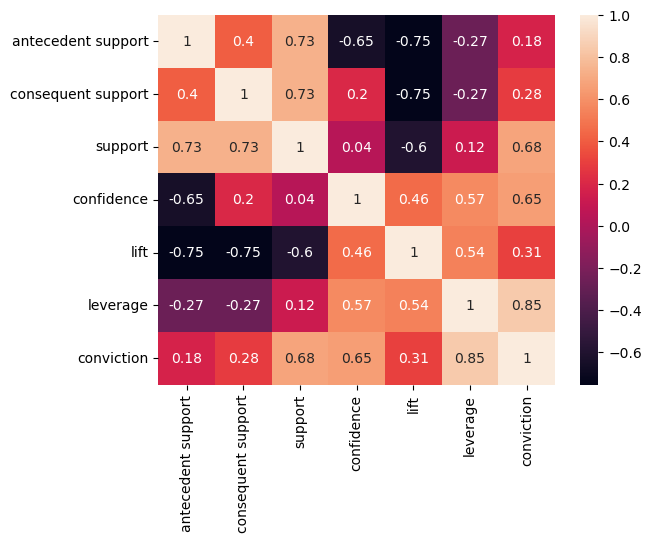

In [45]:
sns.heatmap(cor,annot=True)
plt.show()

In [46]:
#the conviction has high corelation with leverage.So, they are more correlated to each other.

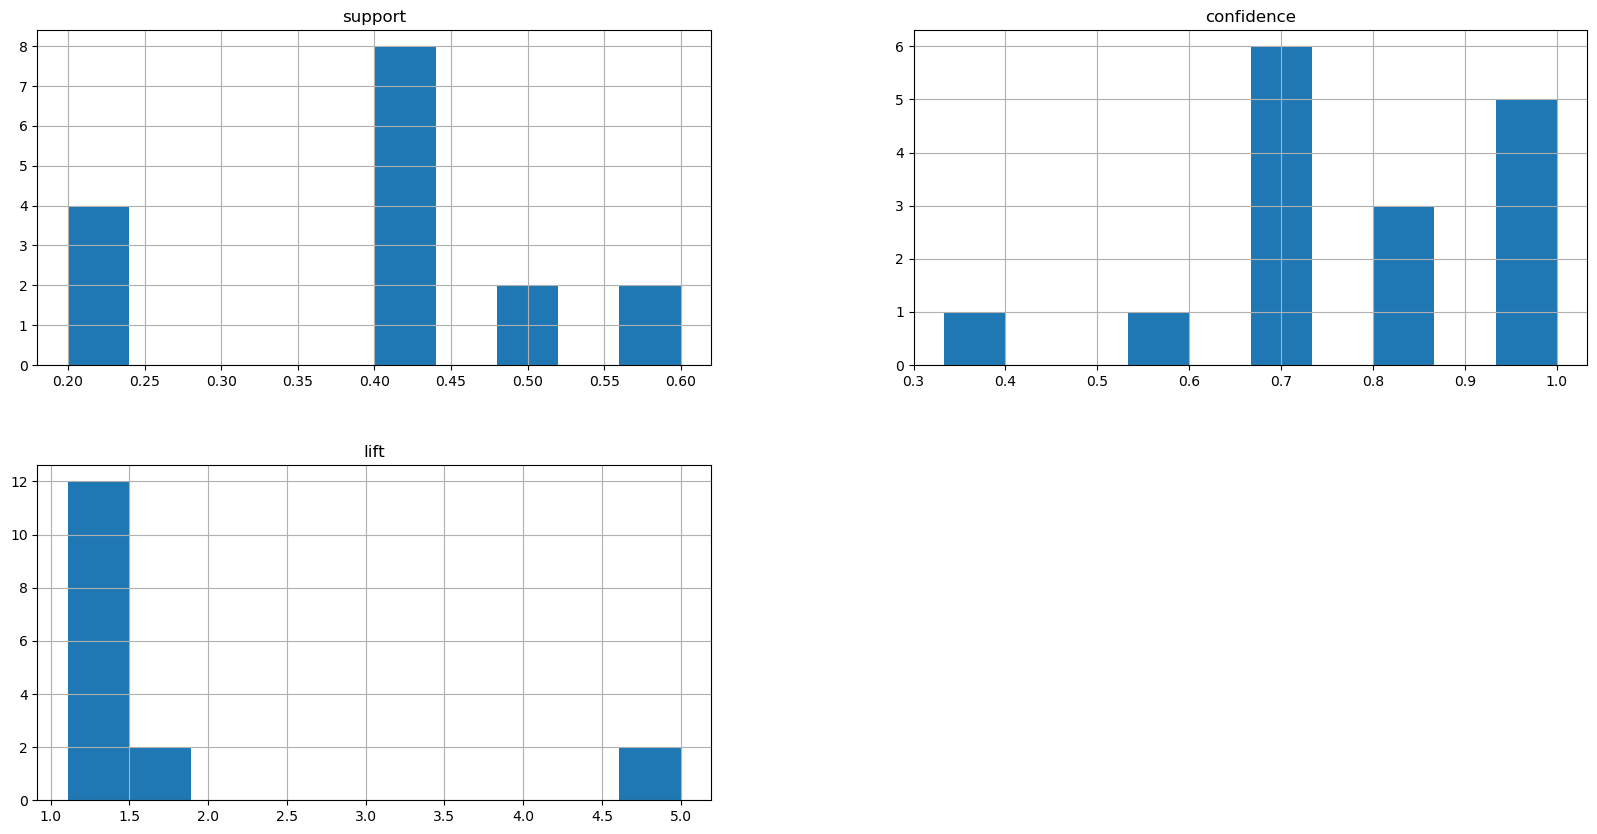

In [47]:
asso_rule[['support','confidence','lift']].hist(figsize=(20,10))
plt.show()

In [48]:
asso_rule['lhs items'] = asso_rule['antecedents'].apply(lambda x:len(x) )
asso_rule[asso_rule['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
12,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
11,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

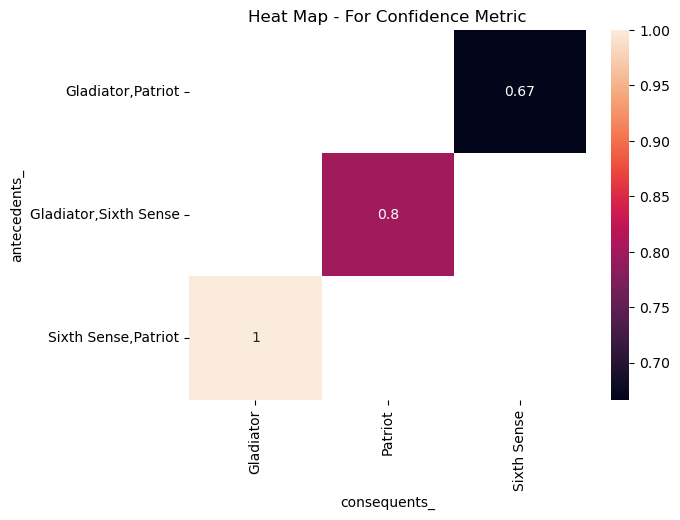

In [49]:
asso_rule['antecedents_'] = asso_rule['antecedents'].apply(lambda a: ','.join(list(a)))
asso_rule['consequents_'] = asso_rule['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = asso_rule[asso_rule['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [ ]:
'''Insights: 1.If a person is watching Sixth Sence and Patriot movies then he will definitely watch Gladiator movie.
             2.If a person watched Gladiator and Sixth SEnce movie then 80% of cahnces that he will watch Patriot movie.
             3.And at 67% if the had watched Gladiator and Patriot then he will watch Sixth Sence. '''

In [50]:
#now we are changing the threshold value

#defing association rule.

asso_rule1=association_rules(itemsets,metric="support",min_threshold=0.4)
asso_rule1

asso_rule1.sort_values('confidence',ascending=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
10,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
11,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8


In [51]:
asso_rule1.shape

(12, 9)

In [52]:
#the rule is giving 12 rows with 9 columns using metric has "support" which taking support values which are more than 40%.

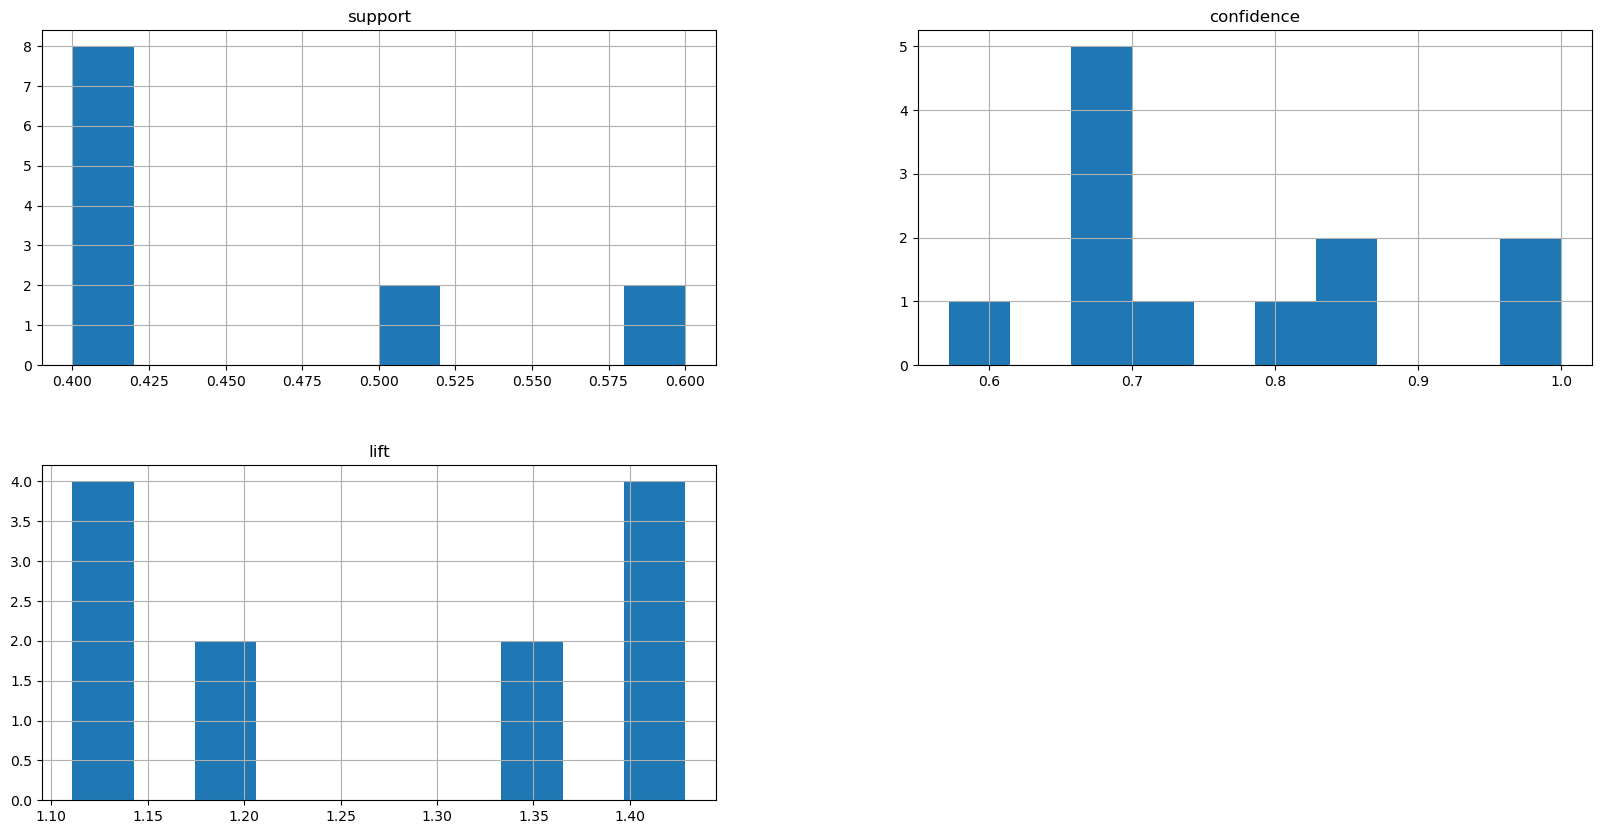

In [53]:
asso_rule1[['support','confidence','lift']].hist(figsize=(20,10))
plt.show()

In [54]:
asso_rule1['lhs items'] = asso_rule1['antecedents'].apply(lambda x:len(x) )
asso_rule1[asso_rule1['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
8,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
7,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

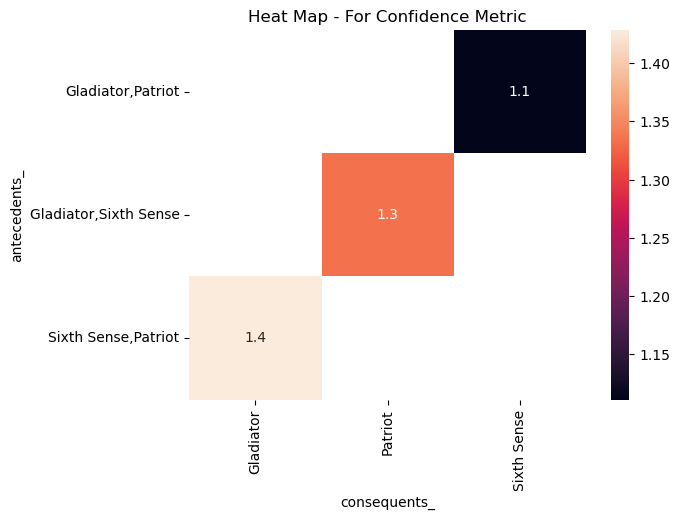

In [55]:
asso_rule1['antecedents_'] = asso_rule1['antecedents'].apply(lambda a: ','.join(list(a)))
asso_rule1['consequents_'] = asso_rule1['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = asso_rule1[asso_rule1['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)